<a href="https://colab.research.google.com/github/Annmary2347211/NNDL/blob/main/Annmary_211_Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Lab-5**

**Lab Assignment: Implementing CNN on the Fashion-MNIST Dataset**

Objective: In this lab, you will implement a Convolutional Neural Network (CNN) using
the Intel Image Classification dataset. Your task is to train a CNN model to classify
these images with high accuracy.

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import cv2
from tqdm import tqdm

**Tasks:**

**1. Dataset Overview:**

o Visualize a few samples from the dataset, displaying their corresponding
labels.

100%|██████████| 346M/346M [00:17<00:00, 21.3MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/puneet6060/intel-image-classification/versions/2
Loading /root/.cache/kagglehub/datasets/puneet6060/intel-image-classification/versions/2/seg_train/seg_train


100%|██████████| 2512/2512 [00:00<00:00, 3063.96it/s]


Loading /root/.cache/kagglehub/datasets/puneet6060/intel-image-classification/versions/2/seg_test/seg_test


100%|██████████| 525/525 [00:00<00:00, 3118.89it/s]


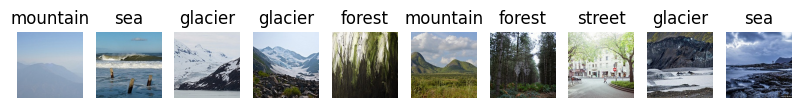

In [6]:
import kagglehub
import numpy as np
import os
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt
import random

# Download the dataset using kagglehub and get the path
path = kagglehub.dataset_download("puneet6060/intel-image-classification")
print("Path to dataset files:", path)

# Class names and labels
class_names = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}
IMAGE_SIZE = (150, 150)

def load_data(dataset_path):
    """
    Load the data:
        - 14,034 images to train the network.
        - 3,000 images to evaluate how accurately the network learned to classify images.
    """

    datasets = [os.path.join(dataset_path, 'seg_train/seg_train'),
                os.path.join(dataset_path, 'seg_test/seg_test')]

    output = []

    # Iterate through training and test sets
    for dataset in datasets:
        images = []
        labels = []

        print(f"Loading {dataset}")

        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]

            # Iterate through each image in the folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):

                # Get the path name of the image
                img_path = os.path.join(dataset, folder, file)

                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE)

                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)

        images = np.array(images, dtype='float32')
        labels = np.array(labels, dtype='int32')

        output.append((images, labels))

    return output

# Load the dataset using the path from kagglehub
dataset_path = path

(x_train, y_train), (x_test, y_test) = load_data(dataset_path)

# Number of samples to visualize
num_samples = 10

# Randomly select samples
random_indices = random.sample(range(len(x_train)), num_samples)

# Plot the images and their labels
plt.figure(figsize=(10, 8))
for i, index in enumerate(random_indices):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(x_train[index].astype('uint8'))  # Ensure correct data type for display
    plt.title(class_names[y_train[index]])
    plt.axis('off')

plt.show()


**2. Model Architecture:**

o Design a CNN model with at least 3 convolutional layers, followed by
pooling layers and fully connected (dense) layers.

o Experiment with different kernel sizes, activation functions (such as
ReLU), and pooling strategies (max-pooling or average pooling).

o Implement batch normalization and dropout techniques to improve the
generalization of your model.

In [7]:
from tensorflow.keras.layers import BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(BatchNormalization())  # Batch normalization
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())  # Batch normalization
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())  # Batch normalization
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization
model.add(Dense(6, activation='softmax'))  # 6 output classes

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 148, 148, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 72, 72, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 34, 34, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,830,022 (18.43 MB)

 Trainable params: 4,829,574 (18.42 MB)

 Non-trainable params: 448 (1.75 KB)

**3. Model Training:**

o Split the dataset into training and test sets.

o Compile the model using an appropriate loss function (categorical cross-
entropy) and an optimizer (such as Adam or SGD).

o Train the model for a sufficient number of epochs, monitoring the training
and validation accuracy.

In [8]:
# Normalize pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 29s 53ms/step - accuracy: 0.3844 - loss: 2.8245 - val_accuracy: 0.2287 - val_loss: 2.6581
Epoch 2/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.4715 - loss: 1.3894 - val_accuracy: 0.4115 - val_loss: 1.9349
Epoch 3/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.5491 - loss: 1.1829 - val_accuracy: 0.5999 - val_loss: 1.1642
Epoch 4/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - accuracy: 0.5869 - loss: 1.0899 - val_accuracy: 0.7100 - val_loss: 0.8968
Epoch 5/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.6328 - loss: 0.9745 - val_accuracy: 0.7072 - val_loss: 0.9261
Epoch 6/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.6618 - loss: 0.8958 - val_accuracy: 0.7068 - val_loss: 0.9347
Epoch 7/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.6767 - loss: 0.8693 - val_accuracy: 0.5212 - val_loss: 1.2997
Epoch 8/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.6903 - loss: 0.8418 - 

**4. Evaluation:**

o Evaluate the trained model on the test set and report the accuracy.

o Plot the training and validation accuracy/loss curves to visualize the
model's performance.

o Display the confusion matrix for the test set to analyze misclassified
samples.

94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.8220 - loss: 0.7712
Test Loss: 0.7551
Test Accuracy: 0.7723


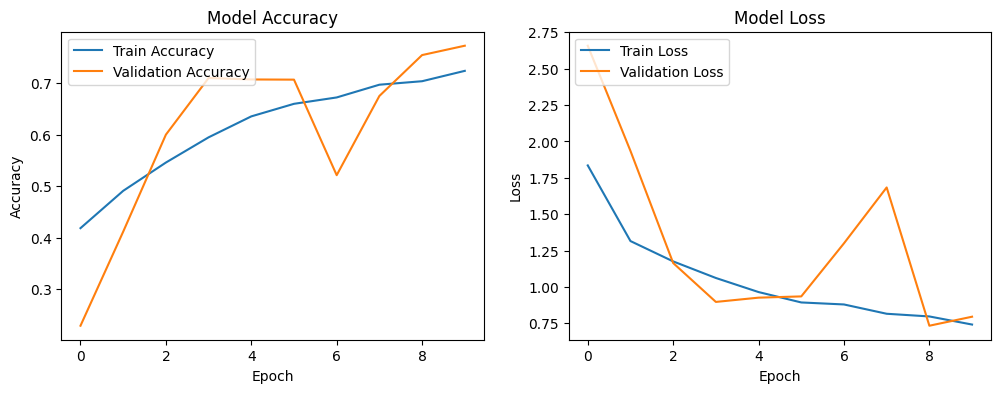

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


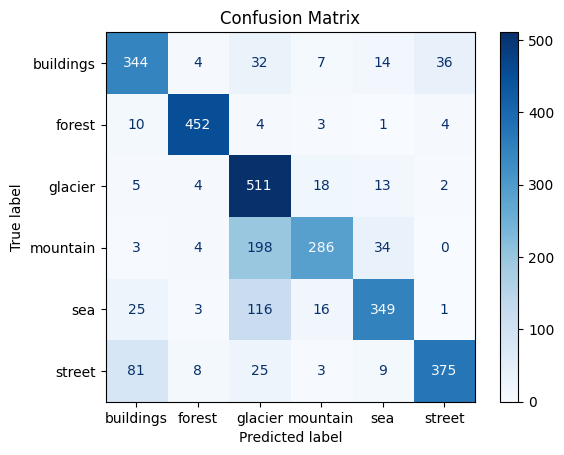

In [9]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.show()

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Predict on the test set
y_pred = np.argmax(model.predict(x_test), axis=1)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names_label.keys())
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


**5. Optimization :**

o Experiment with data augmentation techniques (rotation, flipping,
zooming) to further improve the model’s performance.

o Fine-tune hyperparameters like learning rate, batch size, and the number
of filters in each layer.

In [10]:
# prompt: Optimization :
# o Experiment with data augmentation techniques (rotation, flipping,
# zooming) to further improve the model’s performance.
# o Fine-tune hyperparameters like learning rate, batch size, and the number
# of filters in each layer.
# give 5 epochs

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2
)

datagen.fit(x_train)

# Optimization: Fine-tune hyperparameters (example)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with data augmentation
history = model.fit(datagen.flow(x_train, y_train, batch_size=32),  # Use data augmentation generator
                    epochs=5,  # Reduced epochs for demonstration
                    validation_data=(x_val, y_val))

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


351/351 ━━━━━━━━━━━━━━━━━━━━ 73s 189ms/step - accuracy: 0.5690 - loss: 1.1740 - val_accuracy: 0.6238 - val_loss: 2.2260
Epoch 2/5
351/351 ━━━━━━━━━━━━━━━━━━━━ 73s 173ms/step - accuracy: 0.6072 - loss: 1.0504 - val_accuracy: 0.5358 - val_loss: 1.4975
Epoch 3/5
351/351 ━━━━━━━━━━━━━━━━━━━━ 82s 174ms/step - accuracy: 0.6347 - loss: 0.9774 - val_accuracy: 0.6897 - val_loss: 0.9659
Epoch 4/5
351/351 ━━━━━━━━━━━━━━━━━━━━ 62s 173ms/step - accuracy: 0.6543 - loss: 0.9340 - val_accuracy: 0.6698 - val_loss: 1.0154
Epoch 5/5
351/351 ━━━━━━━━━━━━━━━━━━━━ 62s 174ms/step - accuracy: 0.6603 - loss: 0.8962 - val_accuracy: 0.6733 - val_loss: 0.9160


**Intepretation**

This code trains a Convolutional Neural Network (CNN) to classify images from the Intel Image Classification dataset.  Let's break down the key steps and their interpretations:

1. **Data Loading and Preprocessing:**

   - The code downloads the dataset using `kagglehub`.
   - Images are loaded, resized to 150x150 pixels, and converted to RGB format.
   - Labels are assigned based on the image's folder.
   - Data is split into training and testing sets.
   - Pixel values are normalized to a range of 0-1 (dividing by 255).  This is crucial for neural networks to perform optimally.
   - A few random samples are displayed with their corresponding labels to visualize the dataset.

2. **Model Architecture:**
   - A sequential CNN model is defined using Keras.
   - Three convolutional layers with increasing filter counts (32, 64, 128) are used to extract features.  ReLU activation function introduces non-linearity.
   - Batch normalization is applied after each convolutional layer to stabilize training and accelerate convergence.
   - Max-pooling layers downsample feature maps, reducing computational complexity and providing translation invariance.
   - A flatten layer converts the 2D feature maps into a 1D vector.
   - Dense layers perform the classification, with dropout for regularization (to prevent overfitting).
   - The final dense layer has 6 output neurons (one for each class), using softmax activation for probability distribution across classes.

3. **Model Training:**
   - The model is compiled with the Adam optimizer, sparse categorical cross-entropy loss (suitable for integer labels), and accuracy as the metric.
   - The `model.fit()` function trains the model for a specified number of epochs (10 in this case), using the training data and validating against the validation set.

4. **Model Evaluation:**
    - `model.evaluate()` assesses the model's performance on the test set, reporting loss and accuracy.
    - Training and validation accuracy/loss curves are plotted to visualize the learning process and potential overfitting.
    - A confusion matrix displays the model's performance for each class, revealing misclassifications.

5. **Model Optimization:**
   - Data augmentation techniques (rotation, shifting, flipping, zooming) are introduced using `ImageDataGenerator`. This increases the variability in the training data and helps improve the model's generalization ability.
   - Hyperparameter tuning (optimizer, learning rate, batch size) is suggested for further optimization.

**Overall Interpretation:**
The code demonstrates a standard CNN workflow for image classification. It emphasizes key components like data preprocessing, model design, training, and evaluation.  The inclusion of data augmentation and suggestions for hyperparameter tuning show best practices for achieving robust performance. The confusion matrix is very important for analyzing which classes the model struggles to distinguish.  The comments are very informative and provide an excellent walkthrough.
